# Segunda entrega trabajo integrador

## Analisis exploratorio de datos

In [150]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

date                                               text  \
0  2020-03-03 01:34:00  I was thrilled to be back in the Great city of...   
1  2020-01-17 03:22:00  RT @CBS_Herridge: READ: Letter to surveillance...   
2  2020-09-12 20:10:00  The Unsolicited Mail In Ballot Scam is a major...   
3  2020-01-17 13:13:00  RT @MZHemingway: Very friendly telling of even...   
4  2020-01-17 00:11:00  RT @WhiteHouse: President @realDonaldTrump ann...   

   favorites  retweets     Toxic    Insult  Profanity  Derogatory    Sexual  \
0      73748     17404  0.014622  0.010394   0.002904    0.003574  0.002435   
1          0      7396  0.050346  0.050961   0.023985    0.008934  0.010127   
2      80527     23502  0.258527  0.112138   0.058611    0.043741  0.015008   
3          0      9081  0.018771  0.012035   0.004276    0.003942  0.002470   
4          0     25048  0.016713  0.011194   0.004276    0.005187  0.002435   

   Death, Harm & Tragedy  ...  Illicit Drugs  War & Conflict  Politics  \
0               0.059701  ...       0.036585        0.472222  0.867769   
1               0.085399  ...       0.294118        0.350000  0.680934   
2               0.082609  ...       0.700000        0.058824  0.937500   
3               0.207207  ...       0.057377        0.375000  0.912500   
4               0.073482  ...       0.057377        0.141892  0.969512   

    Finance     Legal  btc_tweet_day  btc_24h_after  btc_48h_after  \
0  0.079710  0.435185        8753.01        8700.00        9085.48   
1  0.081967  0.948357        8850.83        8903.26        8631.95   
2  0.515901  0.858108       10359.99       10280.14       10698.03   
3  0.079710  0.333333        8850.83        8903.26        8631.95   
4  0.102302  0.948357        8850.83        8903.26        8631.95   

   btc_delta_24h  btc_delta_48h  
0         -53.01         332.47  
1          52.43        -218.88  
2         -79.85         338.04  
3          52.43        -218.88  
4          52.43        -218.88  

[5 rows x 25 columns]

In [151]:
# Agregar features de cambio porcentual
# Calcular el cambio porcentual de 24h y 48h vs el precio del día del tweet
df['btc_delta_24h_pct'] = df['btc_delta_24h'] / df['btc_tweet_day']
df['btc_delta_48h_pct'] = df['btc_delta_48h'] / df['btc_tweet_day']

# Verificar los nuevos features
print("Nuevas columnas agregadas:")
print(f"btc_delta_24h_pct: min={df['btc_delta_24h_pct'].min():.4f}, max={df['btc_delta_24h_pct'].max():.4f}")
print(f"btc_delta_48h_pct: min={df['btc_delta_48h_pct'].min():.4f}, max={df['btc_delta_48h_pct'].max():.4f}")

df[['btc_tweet_day', 'btc_delta_24h', 'btc_delta_48h', 'btc_delta_24h_pct', 'btc_delta_48h_pct']].head()


Nuevas columnas agregadas:
btc_delta_24h_pct: min=-0.2287, max=0.2680
btc_delta_48h_pct: min=-0.3404, max=0.2413


btc_tweet_day  btc_delta_24h  btc_delta_48h  btc_delta_24h_pct  \
0        8753.01         -53.01         332.47          -0.006056   
1        8850.83          52.43        -218.88           0.005924   
2       10359.99         -79.85         338.04          -0.007708   
3        8850.83          52.43        -218.88           0.005924   
4        8850.83          52.43        -218.88           0.005924   

   btc_delta_48h_pct  
0           0.037984  
1          -0.024730  
2           0.032629  
3          -0.024730  
4          -0.024730

Vamos a comenzar acomodando las columnas generadas por la herramienta de analisis de Google, normlaizandolas\

Para eso se normaliza re escalando contra el maximo del valor de la columna

In [152]:
# Convertir todas las columnas a lowercase snake_case
import re

def to_snake_case(name):
    """Convierte un string a snake_case"""
    # Insertar un guión bajo antes de cualquier letra mayúscula que esté precedida por una letra minúscula
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    # Insertar un guión bajo antes de cualquier letra mayúscula que esté precedida por una letra minúscula o dígito
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)
    # Convertir a minúsculas y reemplazar espacios y guiones con guiones bajos
    s3 = re.sub(r'[-\s]+', '_', s2)
    # Limpiar guiones bajos múltiples
    s4 = re.sub(r'_+', '_', s3)
    # Remover guiones bajos al inicio y final
    return s4.strip('_').lower()


# Convertir a snake_case
df.columns = [to_snake_case(col) for col in df.columns]


In [153]:
from sklearn.preprocessing import MinMaxScaler

# Google columns to rescale
columns_to_rescale = [
    'toxic', 'insult', 'profanity', 'derogatory', 'sexual', 
    'death,_harm_&_tragedy', 'violent', 'firearms_&_weapons', 
    'public_safety', 'health', 'religion_&_belief', 'illicit_drugs', 
    'war_&_conflict', 'politics', 'finance', 'legal'
]

# Filtrar solo las columnas que existen
existing_columns = [col for col in columns_to_rescale if col in df.columns]

# Aplicar MinMaxScaler directamente al DataFrame original
scaler = MinMaxScaler(feature_range=(0, 1))
df[existing_columns] = scaler.fit_transform(df[existing_columns])

df[existing_columns].head()


toxic    insult  profanity  derogatory    sexual  death,_harm_&_tragedy  \
0  0.004080  0.004846   0.003078    0.005484  0.003537               0.059701   
1  0.043941  0.052683   0.025424    0.013710  0.015471               0.085399   
2  0.276231  0.124824   0.062128    0.067121  0.023045               0.082609   
3  0.008710  0.006781   0.004532    0.006049  0.003591               0.207207   
4  0.006414  0.005790   0.004532    0.007959  0.003537               0.073482   

    violent  firearms_&_weapons  public_safety    health  religion_&_belief  \
0  0.016369            0.018182       0.051813  0.023788           0.053924   
1  0.777035            0.105263       0.976744  0.102968           0.019229   
2  0.238746            0.105263       0.594771  0.102968           0.101176   
3  0.195894            0.018182       0.594771  0.034775           0.053924   
4  0.187486            0.076923       0.090909  0.096141           0.927211   

   illicit_drugs  war_&_conflict  politics   finance     legal  
0       0.036585        0.472222  0.867769  0.079770  0.435185  
1       0.294118        0.350000  0.680934  0.082029  0.948357  
2       0.700000        0.058824  0.937500  0.516288  0.858108  
3       0.057377        0.375000  0.912500  0.079770  0.333333  
4       0.057377        0.141892  0.969512  0.102379  0.948357

## En busca de correlaciones

In [154]:
# Función para generar scatter plots de variables Google vs BTC deltas porcentuales
import matplotlib.pyplot as plt
def plot_google_vs_btc_deltas(column_name, title_name=None):
    """
    Genera scatter plots de una variable Google vs los deltas porcentuales de BTC
    Con colores condicionales: azul para no presidencia, naranja para durante presidencia
    
    Parameters:
    column_name (str): Nombre de la columna de la variable Google
    title_name (str): Nombre para mostrar en el título (opcional, usa column_name si no se proporciona)
    """
    if title_name is None:
        title_name = column_name.replace('_', ' ').title()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Verificar si existe la columna is_president, si no crearla
    if 'is_president' not in df.columns:
        # Convertir la columna de fecha a datetime si no está convertida
        if df['date'].dtype == 'object':
            df['date'] = pd.to_datetime(df['date'])
        
        # Fechas de la presidencia de Trump: 20 de enero de 2017 a 20 de enero de 2021
        trump_inauguration = pd.to_datetime('2017-01-20')
        trump_end = pd.to_datetime('2021-01-20')
        
        # Crear columna indicadora de si Trump era presidente en el momento del tweet
        df['is_president'] = (df['date'] >= trump_inauguration) & (df['date'] < trump_end)
        print("Columna 'is_president' creada automáticamente (20 ene 2017 - 20 ene 2021)")
    
    # Crear colores condicionales basados en is_president
    colors = ['#1f77b4' if not is_pres else '#ff7f0e' for is_pres in df['is_president']]
    
    # Scatter plot vs BTC delta 24h porcentual
    scatter1 = ax1.scatter(df[column_name], df['btc_delta_24h_pct'], alpha=0.6, c=colors)
    ax1.set_xlabel(title_name)
    ax1.set_ylabel('BTC Delta 24h (%)')
    ax1.set_title(f'{title_name} vs BTC Delta 24h (%)')
    ax1.grid(True, alpha=0.3)
    
    # Scatter plot vs BTC delta 48h porcentual
    scatter2 = ax2.scatter(df[column_name], df['btc_delta_48h_pct'], alpha=0.6, c=colors)
    ax2.set_xlabel(title_name)
    ax2.set_ylabel('BTC Delta 48h (%)')
    ax2.set_title(f'{title_name} vs BTC Delta 48h (%)')
    ax2.grid(True, alpha=0.3)
    
    # Agregar leyenda personalizada
    import matplotlib.patches as mpatches
    blue_patch = mpatches.Patch(color='#1f77b4', label='Fuera de presidencia')
    orange_patch = mpatches.Patch(color='#ff7f0e', label='Durante presidencia (2017-2021)')
    ax1.legend(handles=[blue_patch, orange_patch])
    ax2.legend(handles=[blue_patch, orange_patch])
    
    plt.tight_layout()
    plt.show()


Columna 'is_president' creada automáticamente (20 ene 2017 - 20 ene 2021)


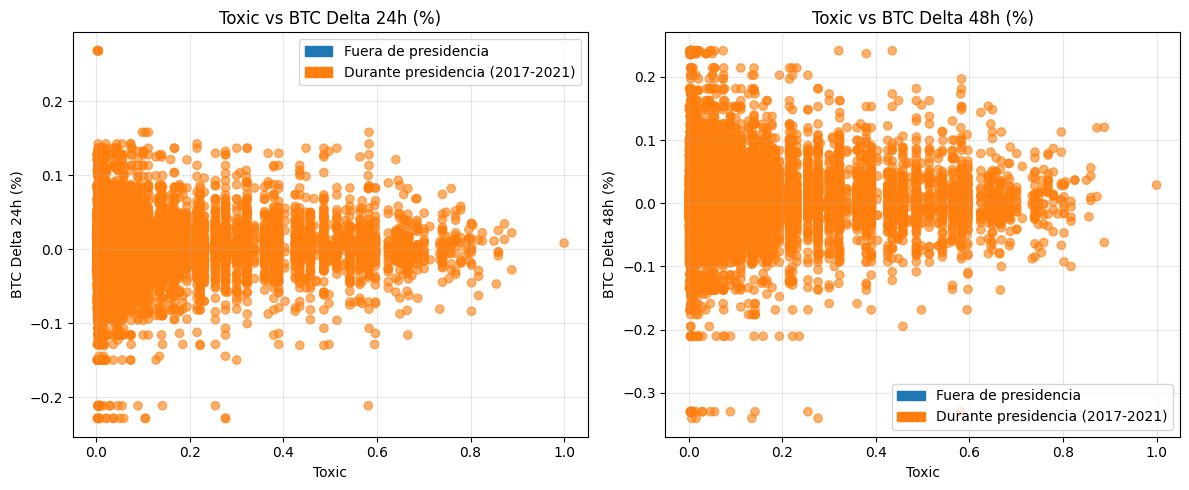

In [155]:
# Scatter plot: toxic vs BTC deltas
plot_google_vs_btc_deltas('toxic')


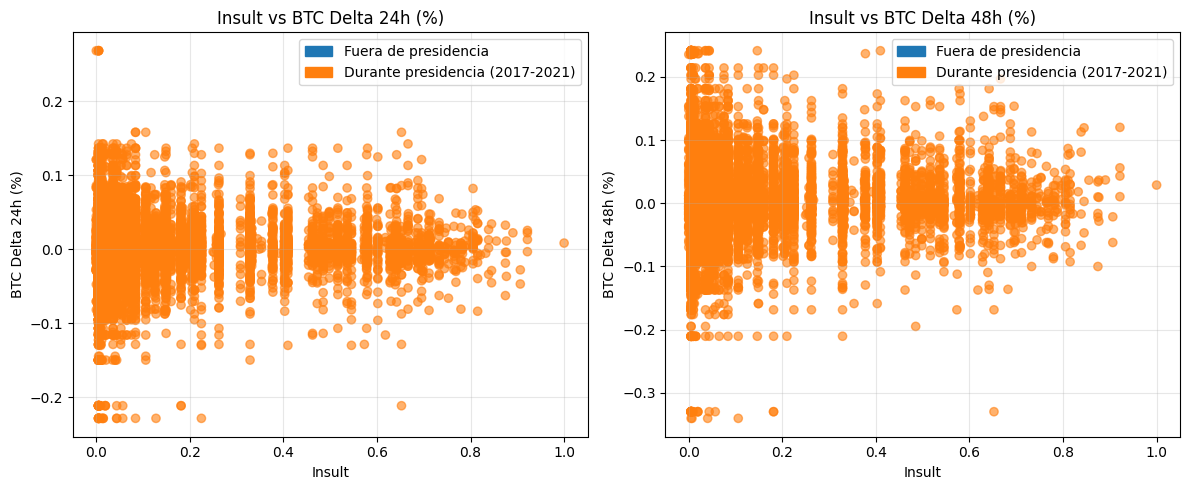

In [156]:
# Scatter plot: insult vs BTC deltas
plot_google_vs_btc_deltas('insult')


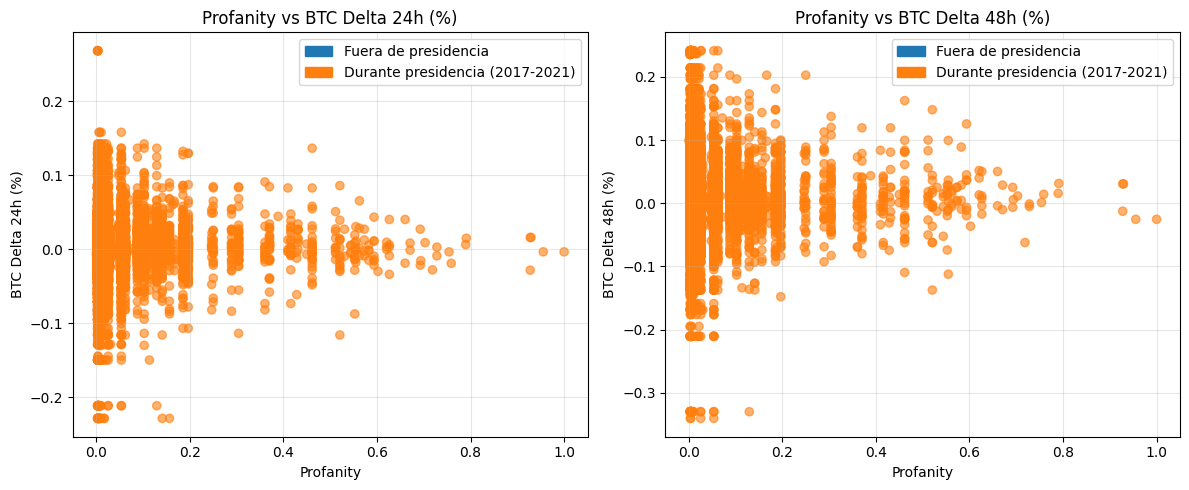

In [157]:
# Scatter plot: profanity vs BTC deltas
plot_google_vs_btc_deltas('profanity')


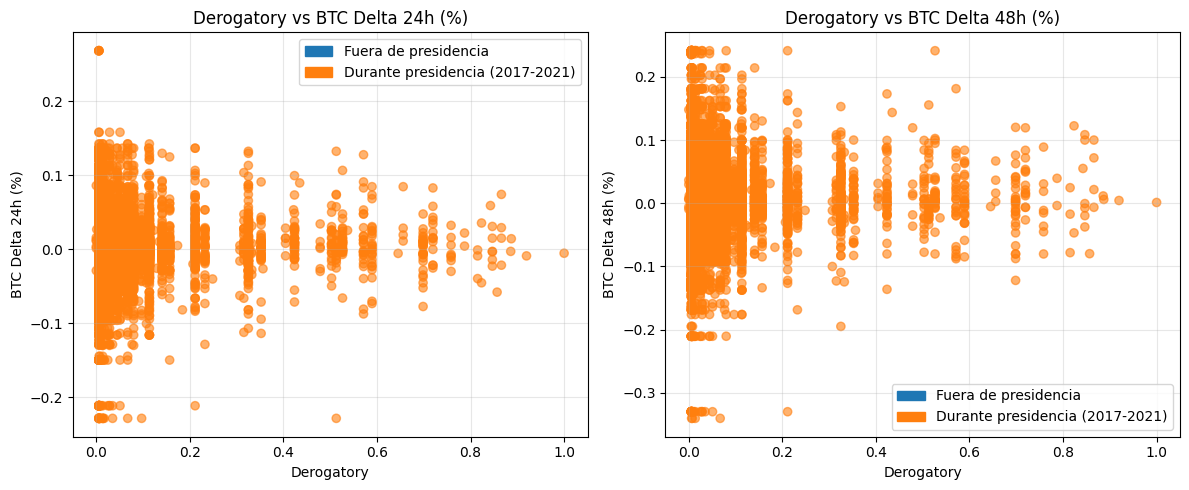

In [158]:
# Scatter plot: derogatory vs BTC deltas
plot_google_vs_btc_deltas('derogatory')


In [ ]:
# Scatter plot: sexual vs BTC deltas
plot_google_vs_btc_deltas('sexual')


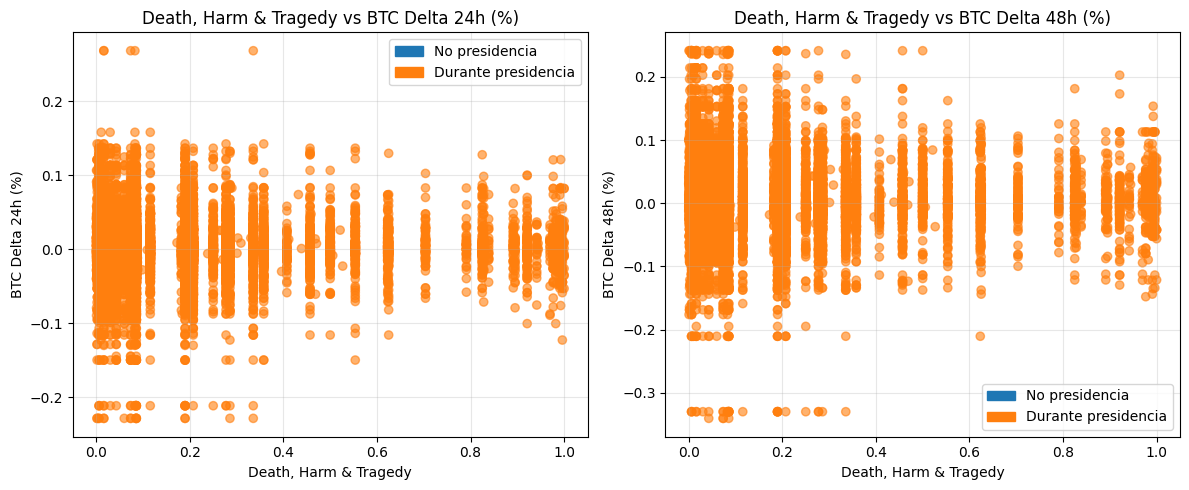

In [ ]:
# Scatter plot: death,_harm_&_tragedy vs BTC deltas
plot_google_vs_btc_deltas('death,_harm_&_tragedy', 'Death, Harm & Tragedy')


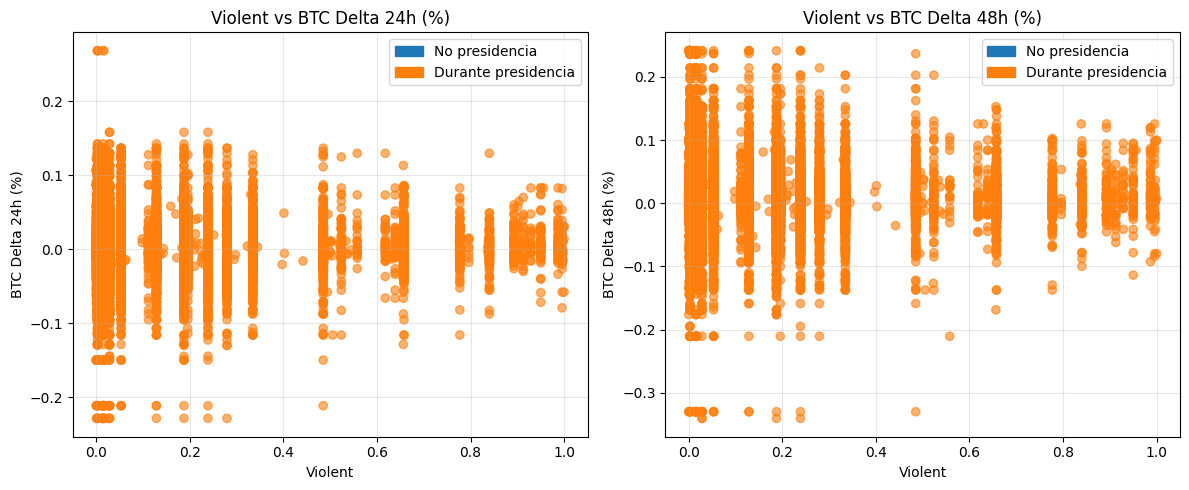

In [ ]:
# Scatter plot: violent vs BTC deltas
plot_google_vs_btc_deltas('violent')


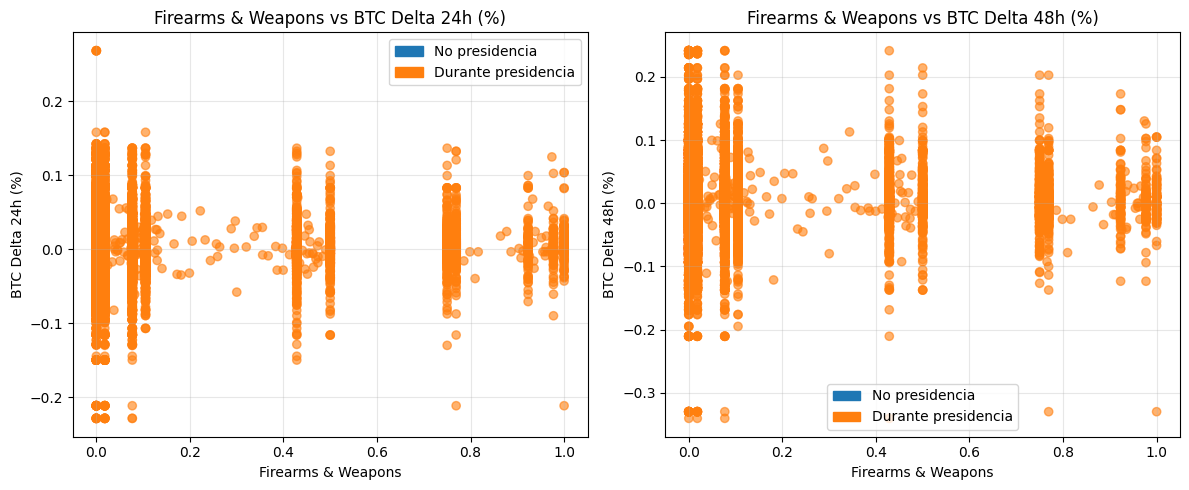

In [ ]:
# Scatter plot: firearms_&_weapons vs BTC deltas
plot_google_vs_btc_deltas('firearms_&_weapons', 'Firearms & Weapons')


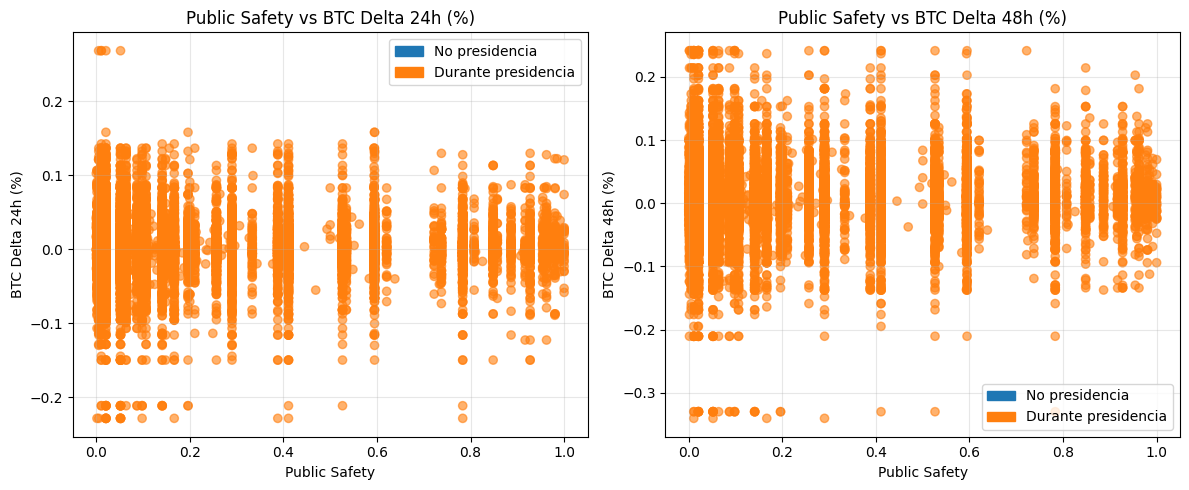

In [ ]:
# Scatter plot: public_safety vs BTC deltas
plot_google_vs_btc_deltas('public_safety', 'Public Safety')


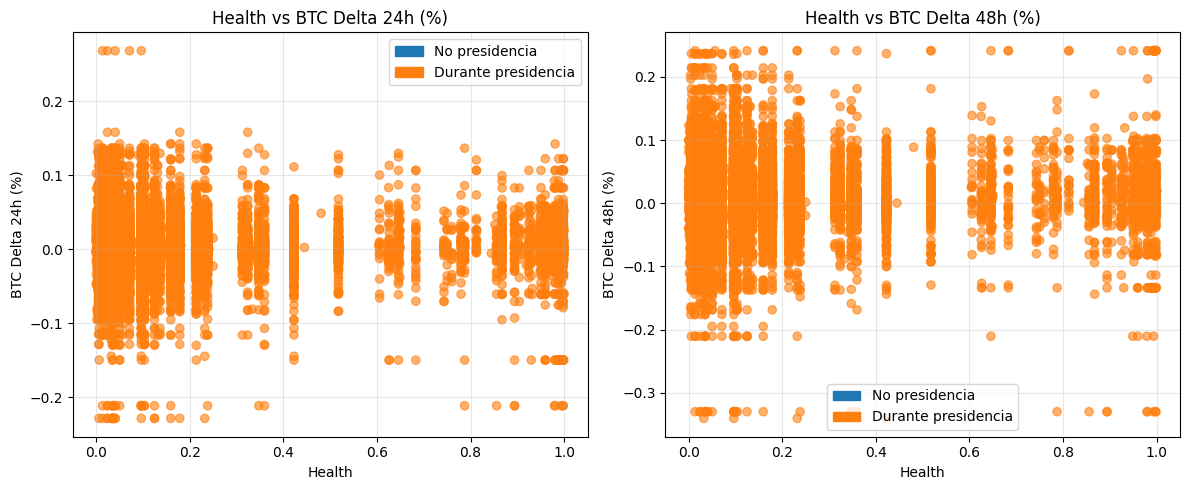

In [ ]:
# Scatter plot: health vs BTC deltas
plot_google_vs_btc_deltas('health')


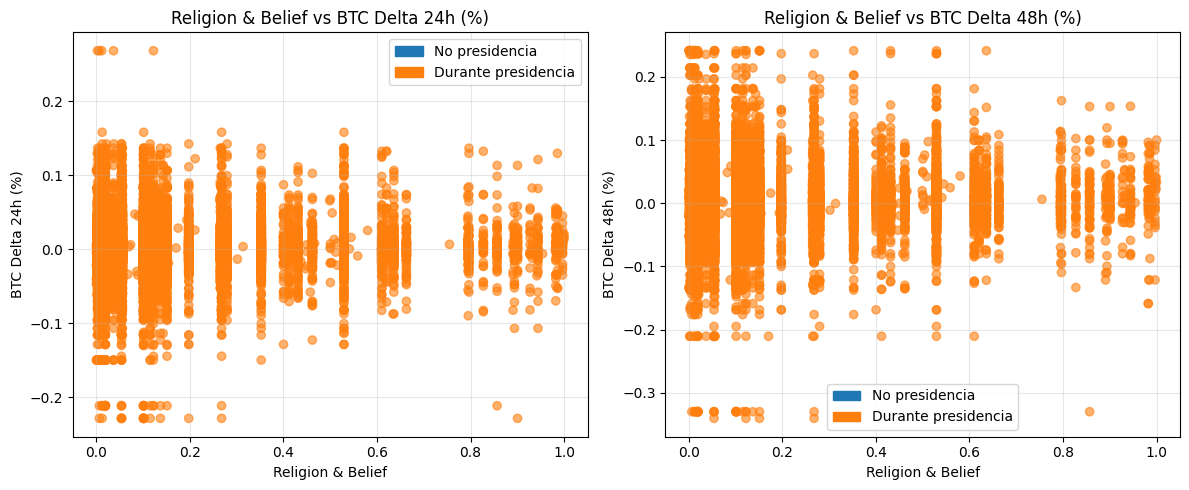

In [ ]:
# Scatter plot: religion_&_belief vs BTC deltas
plot_google_vs_btc_deltas('religion_&_belief', 'Religion & Belief')


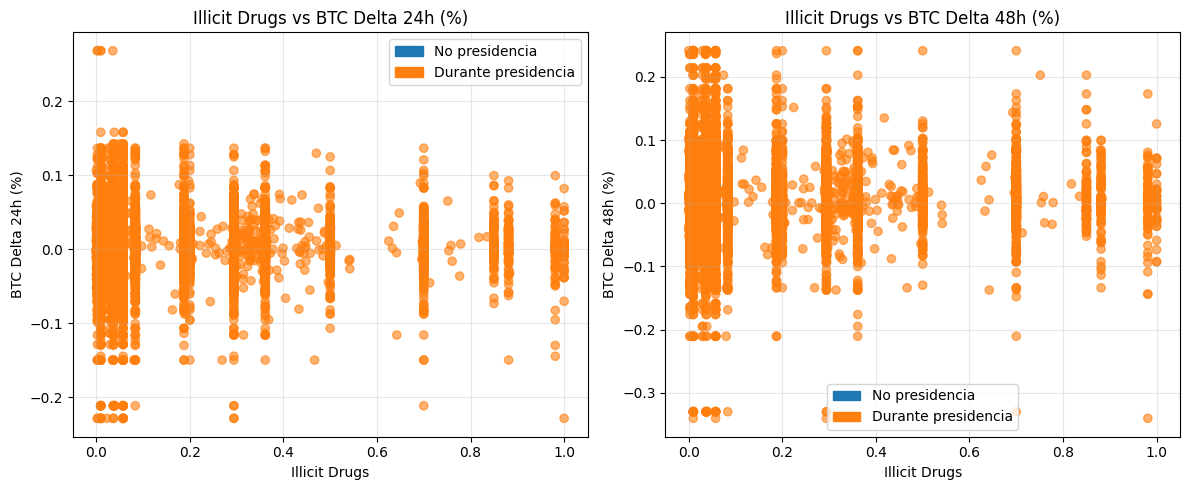

In [ ]:
# Scatter plot: illicit_drugs vs BTC deltas
plot_google_vs_btc_deltas('illicit_drugs', 'Illicit Drugs')


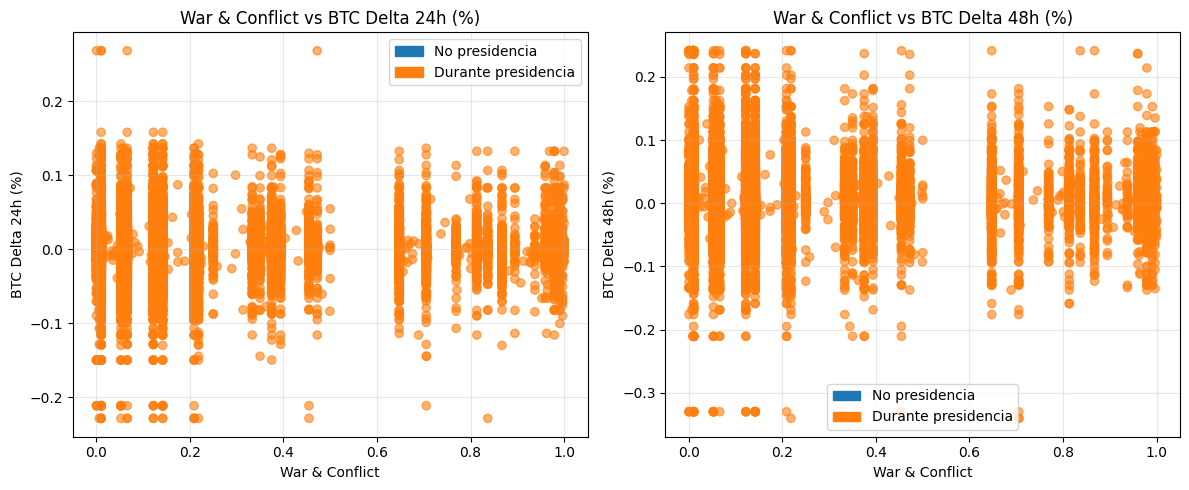

In [ ]:
# Scatter plot: war_&_conflict vs BTC deltas
plot_google_vs_btc_deltas('war_&_conflict', 'War & Conflict')


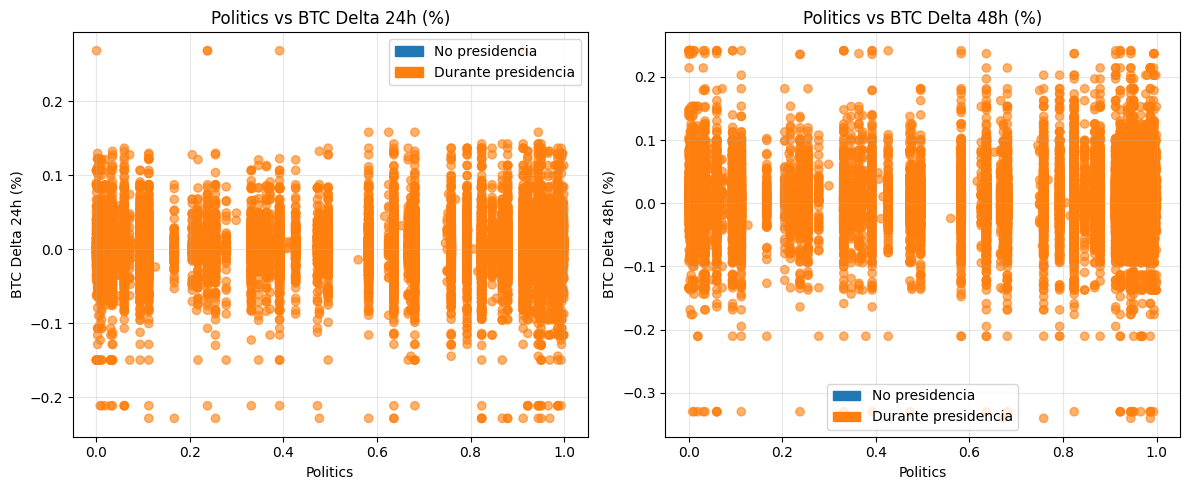

In [ ]:
# Scatter plot: politics vs BTC deltas
plot_google_vs_btc_deltas('politics')


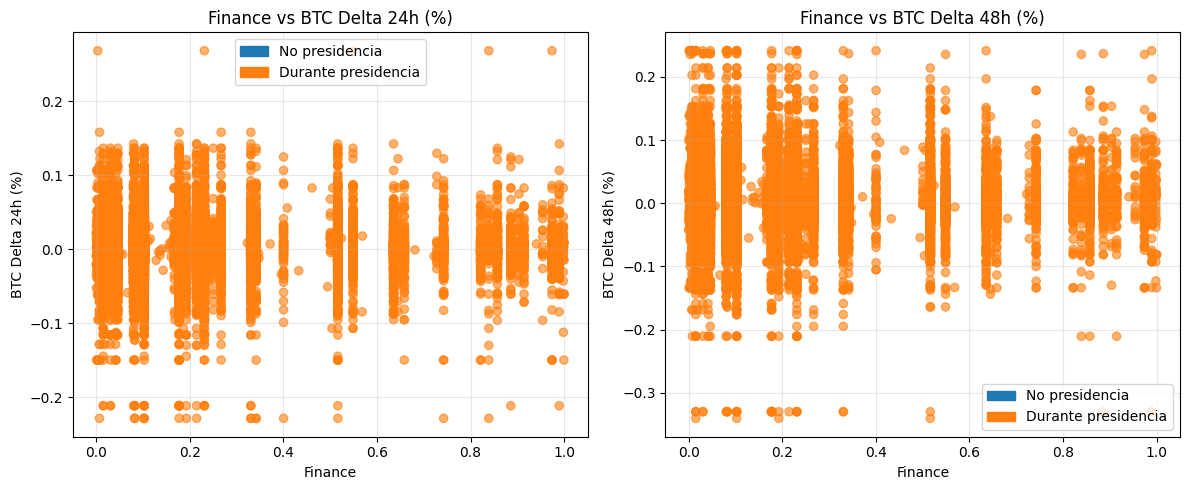

In [ ]:
# Scatter plot: finance vs BTC deltas
plot_google_vs_btc_deltas('finance')


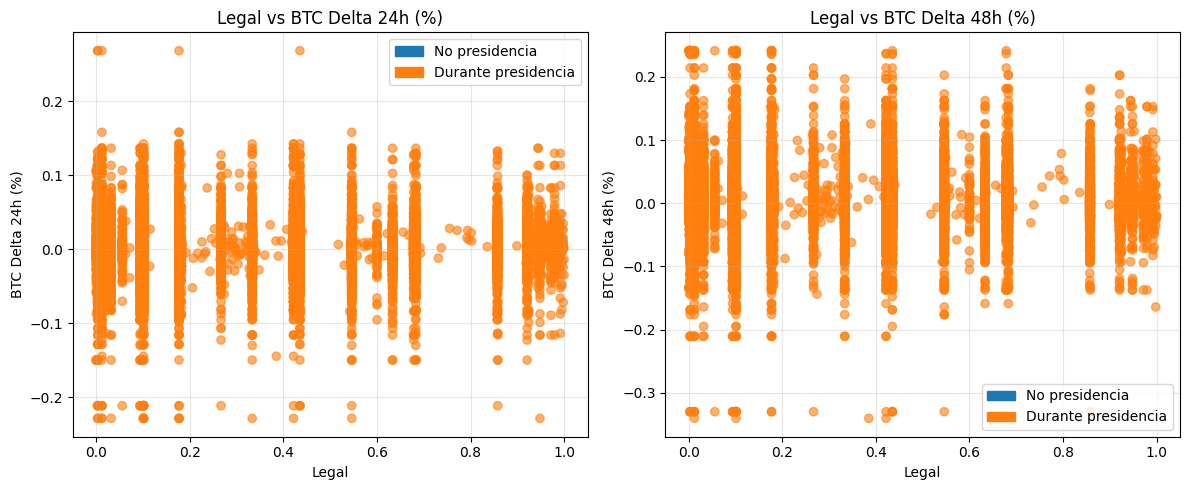

In [ ]:
# Scatter plot: legal vs BTC deltas
plot_google_vs_btc_deltas('legal')


In [ ]:
# Convertir la columna de fecha a datetime y crear indicador de presidencia
df['date'] = pd.to_datetime(df['date'])

# Fechas de la presidencia de Trump: 20 de enero de 2017 a 20 de enero de 2021
trump_inauguration = pd.to_datetime('2017-01-20')
trump_end = pd.to_datetime('2021-01-20')

# Crear columna indicadora de si Trump era presidente en el momento del tweet
df['is_president'] = (df['date'] >= trump_inauguration) & (df['date'] < trump_end)

# Verificar la distribución
print(f"Tweets durante la presidencia (20 ene 2017 - 20 ene 2021): {df['is_president'].sum()}")
print(f"Tweets fuera de la presidencia: {(~df['is_president']).sum()}")
print(f"Fecha más temprana: {df['date'].min()}")
print(f"Fecha más tardía: {df['date'].max()}")

# Mostrar algunos ejemplos de cada período
print(f"\nEjemplos de tweets durante presidencia:")
print(df[df['is_president']][['date', 'is_president']].head(3))
print(f"\nEjemplos de tweets fuera de presidencia:")
print(df[~df['is_president']][['date', 'is_president']].head(3))

df[['date', 'is_president']].head(10)


Tweets durante la presidencia: 22451
Tweets antes de la presidencia: 0
Fecha más temprana: 2018-01-02 12:09:00
Fecha más tardía: 2021-01-08 15:44:00


date  is_president
0 2020-03-03 01:34:00          True
1 2020-01-17 03:22:00          True
2 2020-09-12 20:10:00          True
3 2020-01-17 13:13:00          True
4 2020-01-17 00:11:00          True
5 2020-02-01 16:14:00          True
6 2020-10-23 04:30:00          True
7 2020-03-08 04:01:00          True
8 2020-02-07 17:35:00          True
9 2020-01-09 12:24:00          True

In [ ]:
# Función mejorada para generar scatter plots con distinción por período presidencial
import matplotlib.pyplot as plt
import numpy as np

def plot_google_vs_btc_deltas_presidential(column_name, title_name=None):
    """
    Genera scatter plots de una variable Google vs los deltas porcentuales de BTC
    distinguiendo entre tweets durante y antes de la presidencia de Trump
    Mismo formato que plot_google_vs_btc_deltas pero con colores por período presidencial
    
    Parameters:
    column_name (str): Nombre de la columna de la variable Google
    title_name (str): Nombre para mostrar en el título (opcional, usa column_name si no se proporciona)
    """
    if title_name is None:
        title_name = column_name.replace('_', ' ').title()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Separar datos por período presidencial
    before_presidency = df[~df['is_president']]
    during_presidency = df[df['is_president']]
    
    # Colores para cada período
    color_before = '#1f77b4'  # Azul para no presidencia
    color_during = '#ff7f0e'  # Naranja para durante la presidencia
    
    # Scatter plot vs BTC delta 24h porcentual
    if len(before_presidency) > 0:
        ax1.scatter(before_presidency[column_name], before_presidency['btc_delta_24h_pct'], 
                   alpha=0.6, color=color_before, label='No presidencia', s=20)
    if len(during_presidency) > 0:
        ax1.scatter(during_presidency[column_name], during_presidency['btc_delta_24h_pct'], 
                   alpha=0.6, color=color_during, label='Durante presidencia', s=20)
    
    ax1.set_xlabel(title_name)
    ax1.set_ylabel('BTC Delta 24h (%)')
    ax1.set_title(f'{title_name} vs BTC Delta 24h (%)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Scatter plot vs BTC delta 48h porcentual
    if len(before_presidency) > 0:
        ax2.scatter(before_presidency[column_name], before_presidency['btc_delta_48h_pct'], 
                   alpha=0.6, color=color_before, label='No presidencia', s=20)
    if len(during_presidency) > 0:
        ax2.scatter(during_presidency[column_name], during_presidency['btc_delta_48h_pct'], 
                   alpha=0.6, color=color_during, label='Durante presidencia', s=20)
    
    ax2.set_xlabel(title_name)
    ax2.set_ylabel('BTC Delta 48h (%)')
    ax2.set_title(f'{title_name} vs BTC Delta 48h (%)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas por período
    print(f"\n--- Estadísticas para {title_name} ---")
    print(f"No presidencia: {len(before_presidency)} tweets")
    print(f"Durante presidencia: {len(during_presidency)} tweets")
    
    if len(before_presidency) > 0:
        print(f"\nNo presidencia - {title_name}:")
        print(f"  Media: {before_presidency[column_name].mean():.4f}")
        print(f"  Mediana: {before_presidency[column_name].median():.4f}")
        print(f"  Std: {before_presidency[column_name].std():.4f}")
    
    if len(during_presidency) > 0:
        print(f"\nDurante presidencia - {title_name}:")
        print(f"  Media: {during_presidency[column_name].mean():.4f}")
        print(f"  Mediana: {during_presidency[column_name].median():.4f}")
        print(f"  Std: {during_presidency[column_name].std():.4f}")


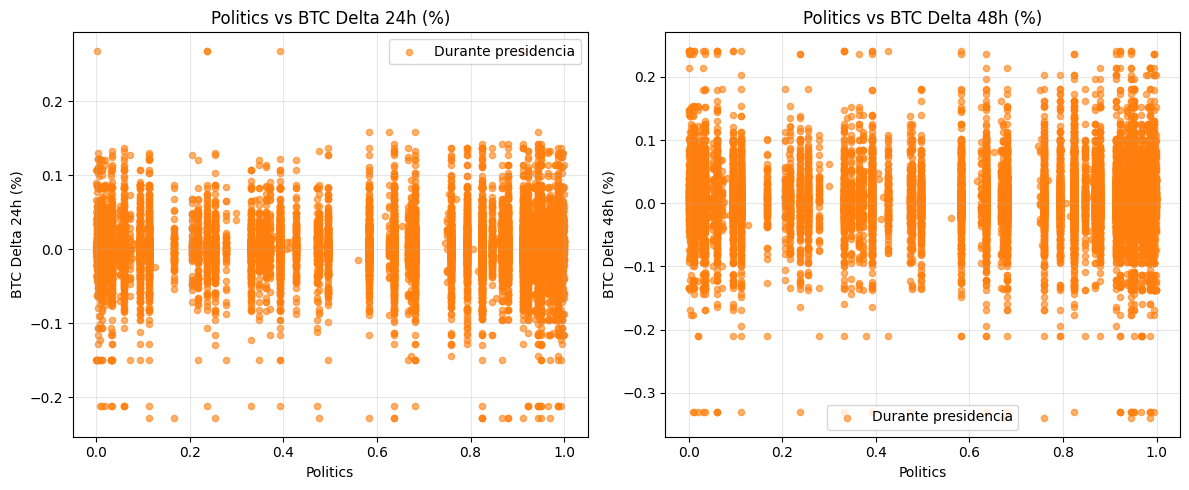


--- Estadísticas para Politics ---
No presidencia: 0 tweets
Durante presidencia: 22451 tweets

Durante presidencia - Politics:
  Media: 0.6473
  Mediana: 0.8239
  Std: 0.3559


In [ ]:
# Ejemplos de uso de la nueva función con distinción presidencial

# Scatter plot: politics vs BTC deltas (con distinción presidencial)
plot_google_vs_btc_deltas_presidential('politics')


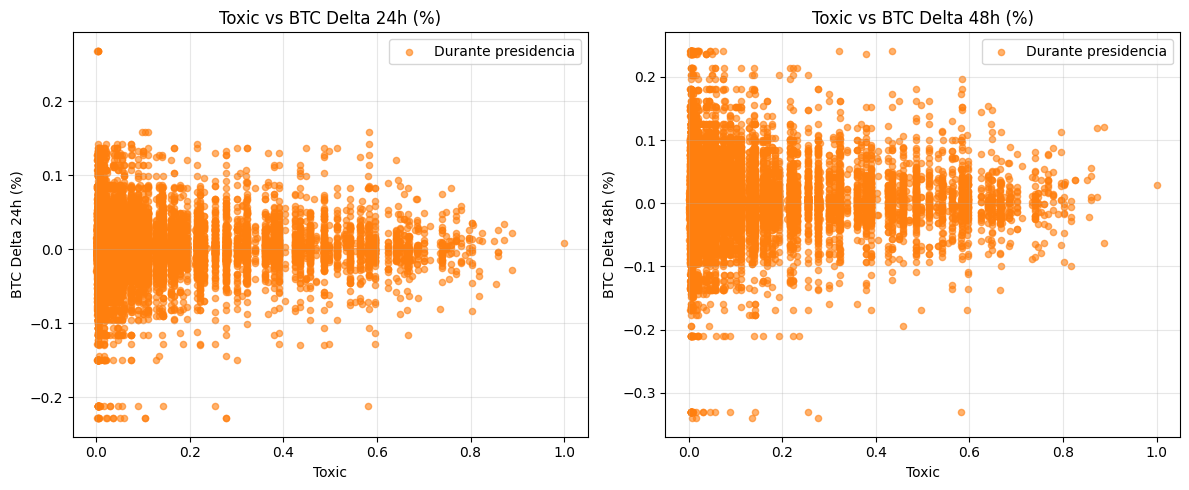


--- Estadísticas para Toxic ---
No presidencia: 0 tweets
Durante presidencia: 22451 tweets

Durante presidencia - Toxic:
  Media: 0.0824
  Mediana: 0.0167
  Std: 0.1411


In [ ]:
# Scatter plot: toxic vs BTC deltas (con distinción presidencial)
plot_google_vs_btc_deltas_presidential('toxic')


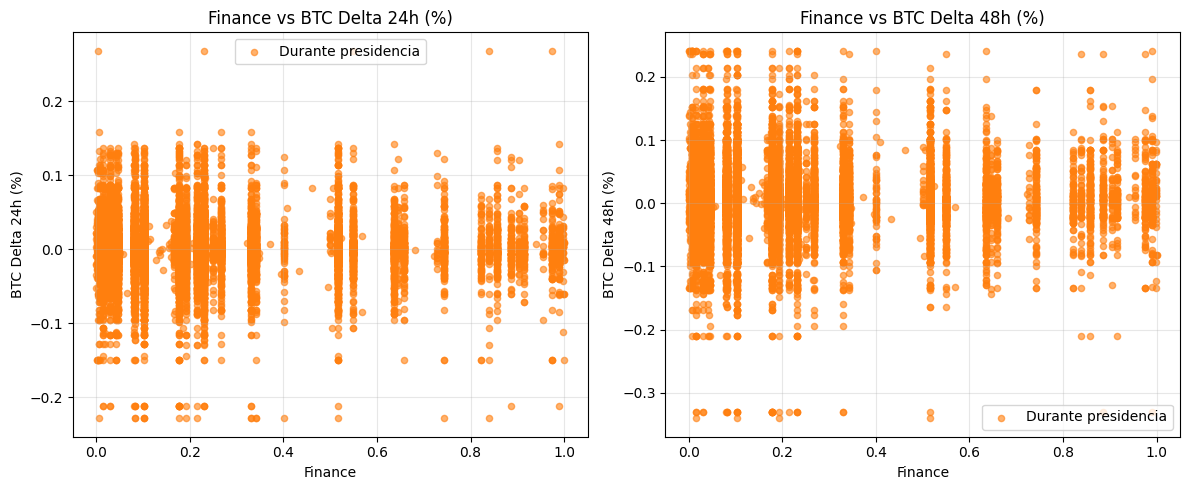


--- Estadísticas para Finance ---
No presidencia: 0 tweets
Durante presidencia: 22451 tweets

Durante presidencia - Finance:
  Media: 0.1985
  Mediana: 0.1024
  Std: 0.2148


In [ ]:
# Scatter plot: finance vs BTC deltas (con distinción presidencial)
plot_google_vs_btc_deltas_presidential('finance')


=== FUNCIÓN ORIGINAL (sin distinción presidencial) ===


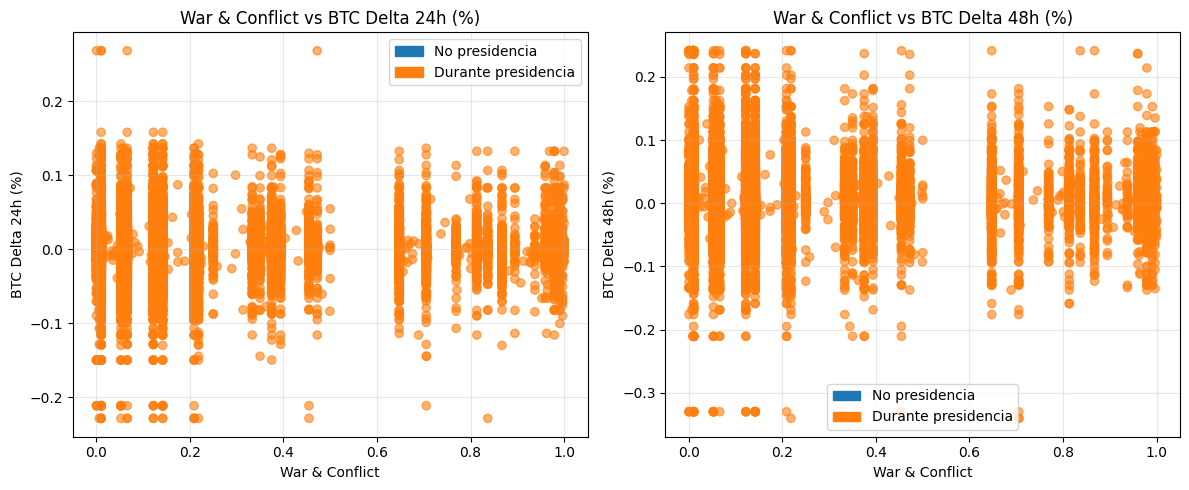


=== FUNCIÓN NUEVA (con distinción presidencial) ===


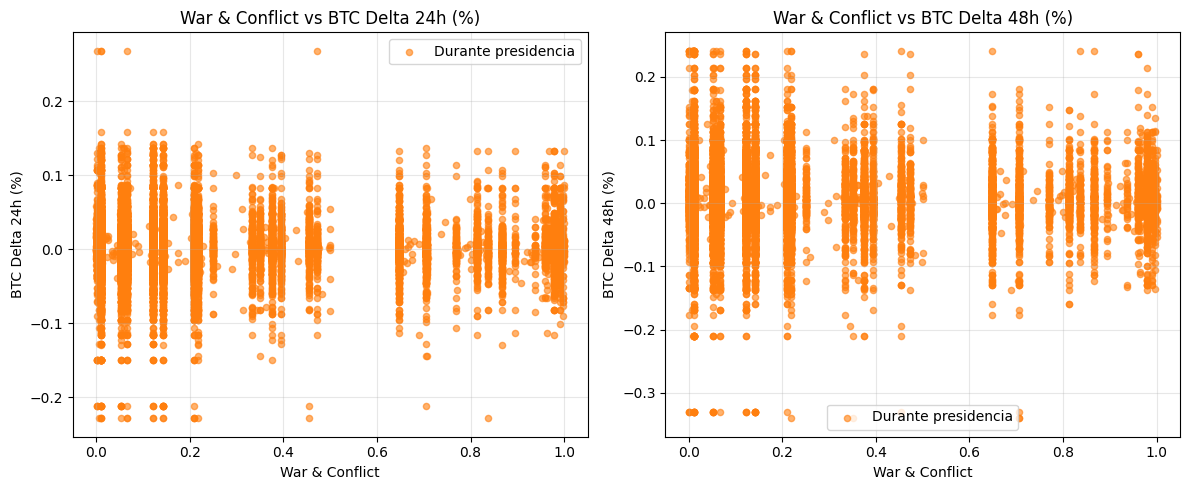


--- Estadísticas para War & Conflict ---
No presidencia: 0 tweets
Durante presidencia: 22451 tweets

Durante presidencia - War & Conflict:
  Media: 0.2174
  Mediana: 0.1220
  Std: 0.2613


In [ ]:
# Comparación: función original vs función con distinción presidencial
print("=== FUNCIÓN ORIGINAL (sin distinción presidencial) ===")
plot_google_vs_btc_deltas('war_&_conflict', 'War & Conflict')

print("\n" + "="*60)
print("=== FUNCIÓN NUEVA (con distinción presidencial) ===")
plot_google_vs_btc_deltas_presidential('war_&_conflict', 'War & Conflict')
